# PERSIANN - Precipitation Data
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@description**: Detalles del procedimiento para solicitar los datos RAW del producto satelital. Y su correspondiente visualización.
 - **Data Source**:  https://chrsdata.eng.uci.edu/
 - **Output**: 
  -  .

 - **Input**: 
   -  https://chrsdata.eng.uci.edu/userFile/PERSIANN-PDIR/mario.garcia9O3kDf.zip (archivos netCDF)
 - **@version**: v1.3
 - **@date**: 2022-08-10,  2022-08-06, 2022-08-01, 2022-07-30, 2022-07-25   



## Request Data



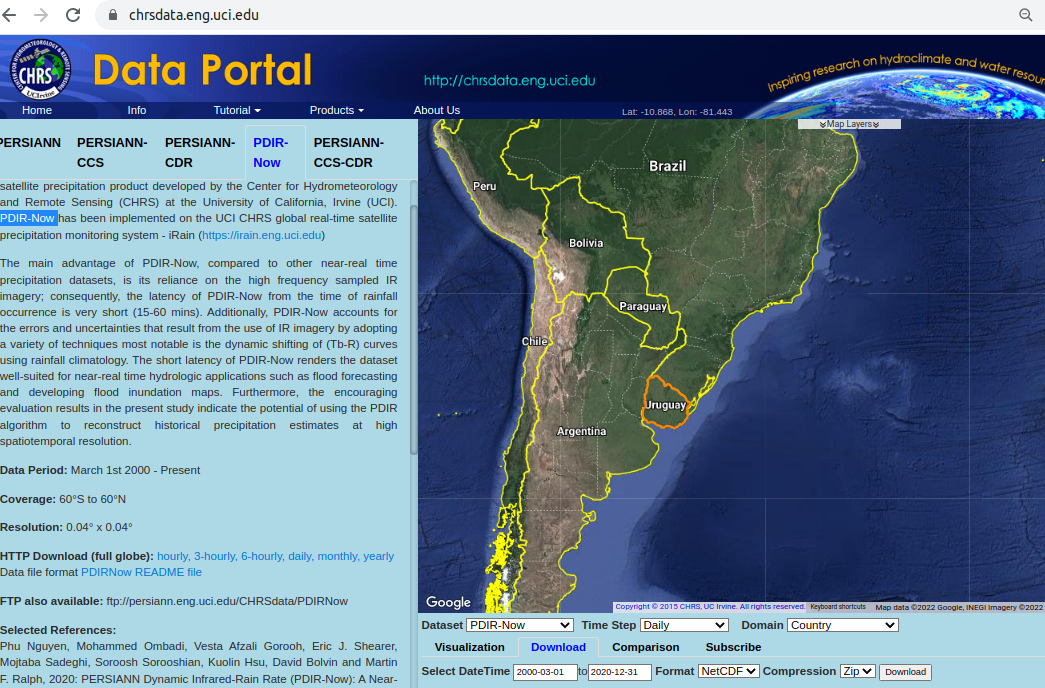

- Url: https://chrsdata.eng.uci.edu/
- Filtres:
  - **Dataset**: PDIR-Now 
  - **Time Step**: Daily
  - **Domain**: Country   *(select uruguay in the map)*
  - Click tab: **Download**
  - **DateTime**: 2000-01-01 **to** 2020-01-31
  - **Format**: NetCDF
  - **Compression**: Zip
  - Click **Download**

## Libraries

In [1]:
# https://pypi.org/project/wget/
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d70baff4d2d6d83e0d4bfc257a5eedcfe4e8285f52d51522bd37de167a23d2fd
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.5 MB/s 
     |████████████████████████████████| 6.3 MB 45.0 MB/s 
     |████████████████████████████████| 16.7 MB 42.2 MB/s 


In [3]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import wget
import os 
import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [4]:
def get_lat_lon(df,lat='lat',lon='lon'):
  char_sep = '#'
  df_ = df.reset_index()[[lat,lon]] #  
  df_['idx'] = df_[lat].astype(str) + char_sep + df_[lon].astype(str)
  df_ = [x.split(char_sep) for x in df_['idx'].unique()]
  df_ = np.array(df_, dtype=np.float64)
  return pd.DataFrame(df_, columns=['lat','lon'])



## Download Data

Check in your email and copy the download link

In [5]:
# Download data
shutil.rmtree('./data', ignore_errors=True)
os.mkdir('./data')

# url="https://chrsdata.eng.uci.edu/userFile/PERSIANN-CDR/mario.garciafPle9H.zip" # <--- paste it, here  (PERSIANN-CDR)
url="https://chrsdata.eng.uci.edu/userFile/PERSIANN-PDIR/mario.garcia9O3kDf.zip"# <--- paste it, here
filename = wget.download(url, out="./data/satellite_data.zip")

In [6]:
filename

'./data/satellite_data.zip'

In [7]:
# unzip data
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('data')

Read info.txt
- **ncols**:  number of columns or width of the raster
- **nrows**:  number of rows or height of the raster
- **cellsize**:  pixel size or resolution
- **xllcorner**:  X coordinate of lower-left corner of the raster
- **yllcorner**:  Y coordinate of the lower-left corner of the raster
- **nodata_value**:  pixel value to be ignored
- **nbits**:  number of bits per pixel
- **pixeltype**:  type of values stored in a pixel, typically float or integer
- **byteorder**:  byte order in which image pixel values are stored, msb or lsb


In [8]:
!cat /content/data/info.txt

Satellite precipitation data in NetCDF format downloaded from UCI CHRS's DataPortal(chrsdata.eng.uci.edu).
Data domain:
ncols     135
nrows    124
xllcorner -58.440
yllcorner -35.000
cellsize 0.04
NODATA_value -99
Unit mm


## Show Data

In [9]:
# we're going to use a netCDF file from ./data folder
path = r'./data/*.nc'
files = glob.glob(path)
file=files[0]
print('\n\nFile:', file,'\n\n')

ds_xr = xr.open_dataset(file)
df_satellite = ds_xr.to_dataframe()
df_satellite



File: ./data/PDIR_Uruguay_2022-08-04105034pm_2005.nc 




crs  precip
lon        lat        datetime                      
-58.439999 -30.040001 2005-01-01 -2147483647     -99
                      2005-01-02 -2147483647     -99
                      2005-01-03 -2147483647     -99
                      2005-01-04 -2147483647     -99
                      2005-01-05 -2147483647     -99
...                                      ...     ...
-53.080002 -34.959999 2005-12-27 -2147483647     -99
                      2005-12-28 -2147483647     -99
                      2005-12-29 -2147483647     -99
                      2005-12-30 -2147483647     -99
                      2005-12-31 -2147483647     -99

[6110100 rows x 2 columns]

In [10]:
print(df_satellite)

                                         crs  precip
lon        lat        datetime                      
-58.439999 -30.040001 2005-01-01 -2147483647     -99
                      2005-01-02 -2147483647     -99
                      2005-01-03 -2147483647     -99
                      2005-01-04 -2147483647     -99
                      2005-01-05 -2147483647     -99
...                                      ...     ...
-53.080002 -34.959999 2005-12-27 -2147483647     -99
                      2005-12-28 -2147483647     -99
                      2005-12-29 -2147483647     -99
                      2005-12-30 -2147483647     -99
                      2005-12-31 -2147483647     -99

[6110100 rows x 2 columns]


## Visualize ShapeFile



File: ./data/Uruguay.shp 




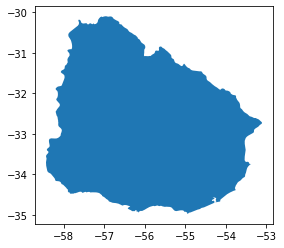

In [11]:

# file_shape = "/content/Uruguay.shp"
path = r'./data/*.shp'
files = glob.glob(path)
file_shape=files[0]
print('\n\nFile:', file_shape,'\n\n')


crs={'init':'epsg:4326'}
geodf_shape = gpd.read_file(file_shape, crs=crs)
geodf_shape.plot()


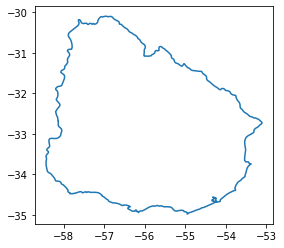

In [12]:
# plot boundaries
geodf_shape.boundary.plot()

## Plot

In [13]:
df_sat_lat_lon = get_lat_lon(df_satellite,'lat','lon')
df_sat_lat_lon[:5]

,lat,lon
0,-30.040001,-58.439999
1,-30.080000,-58.439999
2,-30.120001,-58.439999
3,-30.160000,-58.439999
4,-30.200001,-58.439999


In [14]:
df_sat_lat_lon.describe()

,lat,lon
count,16740.000000,16740.000000
mean,-32.500000,-55.760000
std,1.431825,1.558850
min,-34.959999,-58.439999
25%,-33.730000,-57.119999
50%,-32.500000,-55.759998
75%,-31.270000,-54.400002
max,-30.040001,-53.080002


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


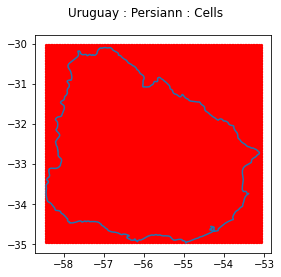

In [15]:
# coordinate reference system
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_sat_lat_lon['lon'], df_sat_lat_lon['lat'])]

fig, ax = plt.subplots()

df_geo_cells = gpd.GeoDataFrame(df_sat_lat_lon,crs=crs, geometry=geometry)
df_geo_cells.plot(ax=ax, color='red', markersize=5)

geodf_shape.boundary.plot(ax=ax)

fig.suptitle('Uruguay : Persiann : Cells ', fontsize=12)
fig.show()

- **Spatial Resolution**: 1°x1°        (157.40 km diagonal distance [111.30kmx111.30km] )
- **Spatial Resolution**: **0.04°x0.04°**  ( km diagonal distance [4.44kmx4.44km] ) 
- **Spatial Resolution**: 0.1°x0.1°        (15.74 km diagonal distance [11.13kmx11.13km] )
- **Spatial Resolution**: 0.05°x0.05°  (7.87 km diagonal distance  [5.57kmx5.57km] )

